## Assignment 3: Language models 

In this assignment we will work on language model, especially its decoding generation procedure.  

In [1]:
# Import the packages
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np 
import graphviz

# Load the packages for visualization
from graphviz import Digraph
import matplotlib.pyplot as plt

In [2]:
# Load the pre-trained model and tokenizer
model_name = "gpt2" 
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

### 1. Explore the causal Language Model (5')
Load a pre-trained Causal Language Model (CLM). 

Tokenize the sentence "An apple a day keeps the doctor away." with the tokenizer of this CLM. Print out the outputs and briefly comment on it.  

Pass the tokenized result to the CLM. Comment on the model's outputs (specifically, the `logits` and the `past_key_values`). Instead of printing out the logits, print out the shapes of the logits and comment on them.  

In [3]:
input_ids = tokenizer.encode("An apple a day keeps the doctors away", return_tensors="pt")
# TODO
print(f"Tokenized input: {input_ids}")



Tokenized input: tensor([[ 2025, 17180,   257,  1110,  7622,   262,  7519,  1497]])


The tokenizer breaks down the sentence into tokens that correspond to a word in the gpt2 vocabulary. For example 2025 represents "An", 17180 represents "apple" and so on. 

In [4]:
outputs = model(input_ids)
# TODO
logits = outputs.logits
past_key_values = outputs.past_key_values
print(f"Shapes of logits: {logits.shape}")
for i, layer in enumerate(past_key_values):
    print(f"Layer {i} past key shape: {layer[0].shape}, past value shape: {layer[1].shape}")

Shapes of logits: torch.Size([1, 8, 50257])
Layer 0 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 1 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 2 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 3 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 4 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 5 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 6 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 7 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 8 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1, 12, 8, 64])
Layer 9 past key shape: torch.Size([1, 12, 8, 64]), past value shape: torch.Size([1

The logits size is explained as having 1 sentence, 8 tokens, and a vocabulary of 50257. The shapes of each layer of the past key shape stays consistent. Each layer includes 12 attention heads of 8 tokens and outputs a value vector with a size of 64.

### 2. Greedy decoding (5')
Implement greedy decoding. With greedy decoding, decode a batch of sentences (decode from the first word). Decode until either the model predicts an "end-of-sentence" token, or until the sequence reaches a maximum length. Do not call the `model.generate()` method -- assignments using this method won't get scores for this part. Following are the sentences:  

> An apple a day keeps the doctors away.  
> Tell me a story.  
> This is excellent!  
> This is terrible!  
> Hey what's up?  
> Better late than never.  
> Desk is an object.  
> Starbucks is a brand.  
> Samsung is another brand.  
> Hurry up!

Do the sentences decoded based on the first word match the sentences? Comment on the results.  

In [10]:
def greedy_decoding(model, tokenizer, start_of_sentences, max_length=50):
    decoded_sentences = []
    
    for sentence in start_of_sentences:
        first_word = sentence.split()[0]
        input_ids = tokenizer.encode(first_word, return_tensors="pt")

        for _ in range(max_length):
            output = model(input_ids=input_ids)
            
            logits = output.logits[:, -1, :]

            next_token_id = torch.argmax(logits, dim=-1).unsqueeze(0)
                        
            if next_token_id.item() == tokenizer.eos_token_id:
                print("the end")
                break

            
            input_ids = torch.cat([input_ids, next_token_id], dim=-1)
        
        output_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
        decoded_sentences.append(output_text)
    
    return decoded_sentences

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

sentences = [
    "An apple a day keeps the doctor away.",
    "Tell me a story.",
    "This is excellent!",
    "This is terrible!",
    "Hey what's up?",
    "Better late than never.",
    "Desk is an object.",
    "Starbucks is a brand.",
    "Samsung is another brand.",
    "Hurry up!"
]

decoded_sentences = greedy_decoding(model, tokenizer, sentences)

for sentence, output in zip(sentences, decoded_sentences):
    first_word = sentence.split()[0]
    print(f"Original Sentence: {sentence}")
    print(f"Generated Sentence: {output}")
    print()

Original Sentence: An apple a day keeps the doctor away.
Generated Sentence: An

The first thing you need to do is to create a new file called "C:\Program Files\Microsoft\Windows\CurrentVersion\Explorer.exe" and add the following to it:

C:\Program Files\Microsoft\

Original Sentence: Tell me a story.
Generated Sentence: Tell the truth.

The truth is that the American people are not going to be able to trust the government to do what it wants to do.

The truth is that the American people are not going to be able to trust the government to

Original Sentence: This is excellent!
Generated Sentence: This is a very good example of how to use the "I'm not a fan of the idea of a 'I'm not a fan of the idea of a 'I'm not a fan of the idea of a 'I'm not a fan of

Original Sentence: This is terrible!
Generated Sentence: This is a very good example of how to use the "I'm not a fan of the idea of a 'I'm not a fan of the idea of a 'I'm not a fan of the idea of a 'I'm not a fan of

Original Sentence

The decoded sentences do not match the sentences provided. A few of the generated sentences follow a similar structure such as Hurry up! and the generated version Hurry up and get ready for the next round of the playoffs. The greedy decoding selects the next word that has the highest probability so in most cases, the generated sentence should follow proper sentence structure. However, few of the generated sentences outputted website or file paths which was not expected. It also seems like the greedy decoding has a tendancy to continuously predict tokens resulting in a loop of repetition that never reaches an end of sentence token. 

### 3. Beam search decoding (5')
Implement beam search decoding. With beam search, decode the same batch of sentences (also decoding from the first word). Do not call the `model.generate()` method -- assignments using this method won't get scores for this part. Try different beam sizes, and comment on their impacts.  

In [87]:
import torch

def beam_search(model, tokenizer, start_of_sentences, beam_sizes=[3], max_length=50):
    results = {}
    
    for beam_width in beam_sizes:
        decoded_sentences = []
        for sentence in start_of_sentences:
            first_word = sentence.split()[0]
            input_ids = tokenizer(first_word, return_tensors="pt")["input_ids"]

            beam = [(input_ids, 0.0)]  

            for _ in range(max_length):
                candidates = []
                for input_ids, beam_score in beam:
                    output = model(input_ids=input_ids)

                    next_token_logits = output.logits[:, -1, :]
                    next_token_probs = torch.log_softmax(next_token_logits, dim=-1)

                    top_k_probs, top_k_ids = torch.topk(next_token_probs, beam_width)

                    for i in range(beam_width):
                        token_id = top_k_ids[:, i].unsqueeze(0)
                        token_log_prob = top_k_probs[:, i].item()

                        new_input_ids = torch.cat([input_ids, token_id], dim=-1)

                        new_score = beam_score + token_log_prob

                        candidates.append((new_input_ids, new_score))

                candidates = sorted(candidates, key=lambda x: x[1], reverse=True)[:beam_width]

                beam = candidates

                if any(tokenizer.eos_token_id in candidate[0] for candidate in beam):
                    print(f"End token reached for Beam Size:{beam_width}, Sentence: {sentence} ")
                    break

            best_sequence = beam[0][0]
            output_text = tokenizer.decode(best_sequence[0], skip_special_tokens=True)
            decoded_sentences.append(output_text)

        results[f"Beam Width {beam_width}"] = decoded_sentences

    return results

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

sentences = [
    "An apple a day keeps the doctor away.",
    "Tell me a story.",
    "This is excellent!",
    "This is terrible!",
    "Hey what's up?",
    "Better late than never.",
    "Desk is an object.",
    "Starbucks is a brand.",
    "Samsung is another brand.",
    "Hurry up!"
]

beam_sizes = [1, 3, 5, 10]
beam_search_results = beam_search(model, tokenizer, sentences, beam_sizes=beam_sizes)

for beam_size, decoded_sentences in beam_search_results.items():
    print(f"\n--- Results for {beam_size} ---")
    for sentence, output in zip(sentences, decoded_sentences):
        first_word = sentence.split()[0]
        print(f"Original Sentence: {sentence}")
        print(f"Generated Sentence: {output}")
        print()

End token reached for Beam Size:3, Sentence: This is excellent! 
End token reached for Beam Size:3, Sentence: This is terrible! 
End token reached for Beam Size:3, Sentence: Starbucks is a brand. 
End token reached for Beam Size:5, Sentence: An apple a day keeps the doctor away. 
End token reached for Beam Size:5, Sentence: Desk is an object. 
End token reached for Beam Size:5, Sentence: Samsung is another brand. 
End token reached for Beam Size:10, Sentence: An apple a day keeps the doctor away. 
End token reached for Beam Size:10, Sentence: Hey what's up? 
End token reached for Beam Size:10, Sentence: Better late than never. 
End token reached for Beam Size:10, Sentence: Desk is an object. 
End token reached for Beam Size:10, Sentence: Starbucks is a brand. 
End token reached for Beam Size:10, Sentence: Samsung is another brand. 

--- Results for Beam Width 1 ---
Original Sentence: An apple a day keeps the doctor away.
Generated Sentence: An

The first thing you need to do is to crea

It seems like as the beam sizes get larger, it is more likely for the model to predict an end of sentence token. A beam size of 1 did not generate a sentence ending with an EOS token. With a beam size of 3 only 3 sentences were ended with an EOS token. With a beam size of 5 still only 3 sentences ended with an EOS token. But with a beam size of 10, 6 of the generated sentences ended with an EOS token. It seems like there was a different variation of sentences that were completed with an EOS token for each beam soze. For example a beam size of 3 generated a sentence starting with Starbucks that ended with an EOS token but a beam size of 5 did not. But then the beam size increased to 10, the generated sentence once again eneded with an EOS token. 

### 4. Visualization (5')
Use [graphviz](https://graphviz.readthedocs.io/en/stable/manual.html) or other plotting tools you are comfortable with using, visualize the decoding procedure of one greedy decoding run and one beam search run of one sentence. The format of the visualization is up to you. However, the top k most probable words (tokens) per step, as well as their predicted (log-)probabilities, should be displayed in the figure.   

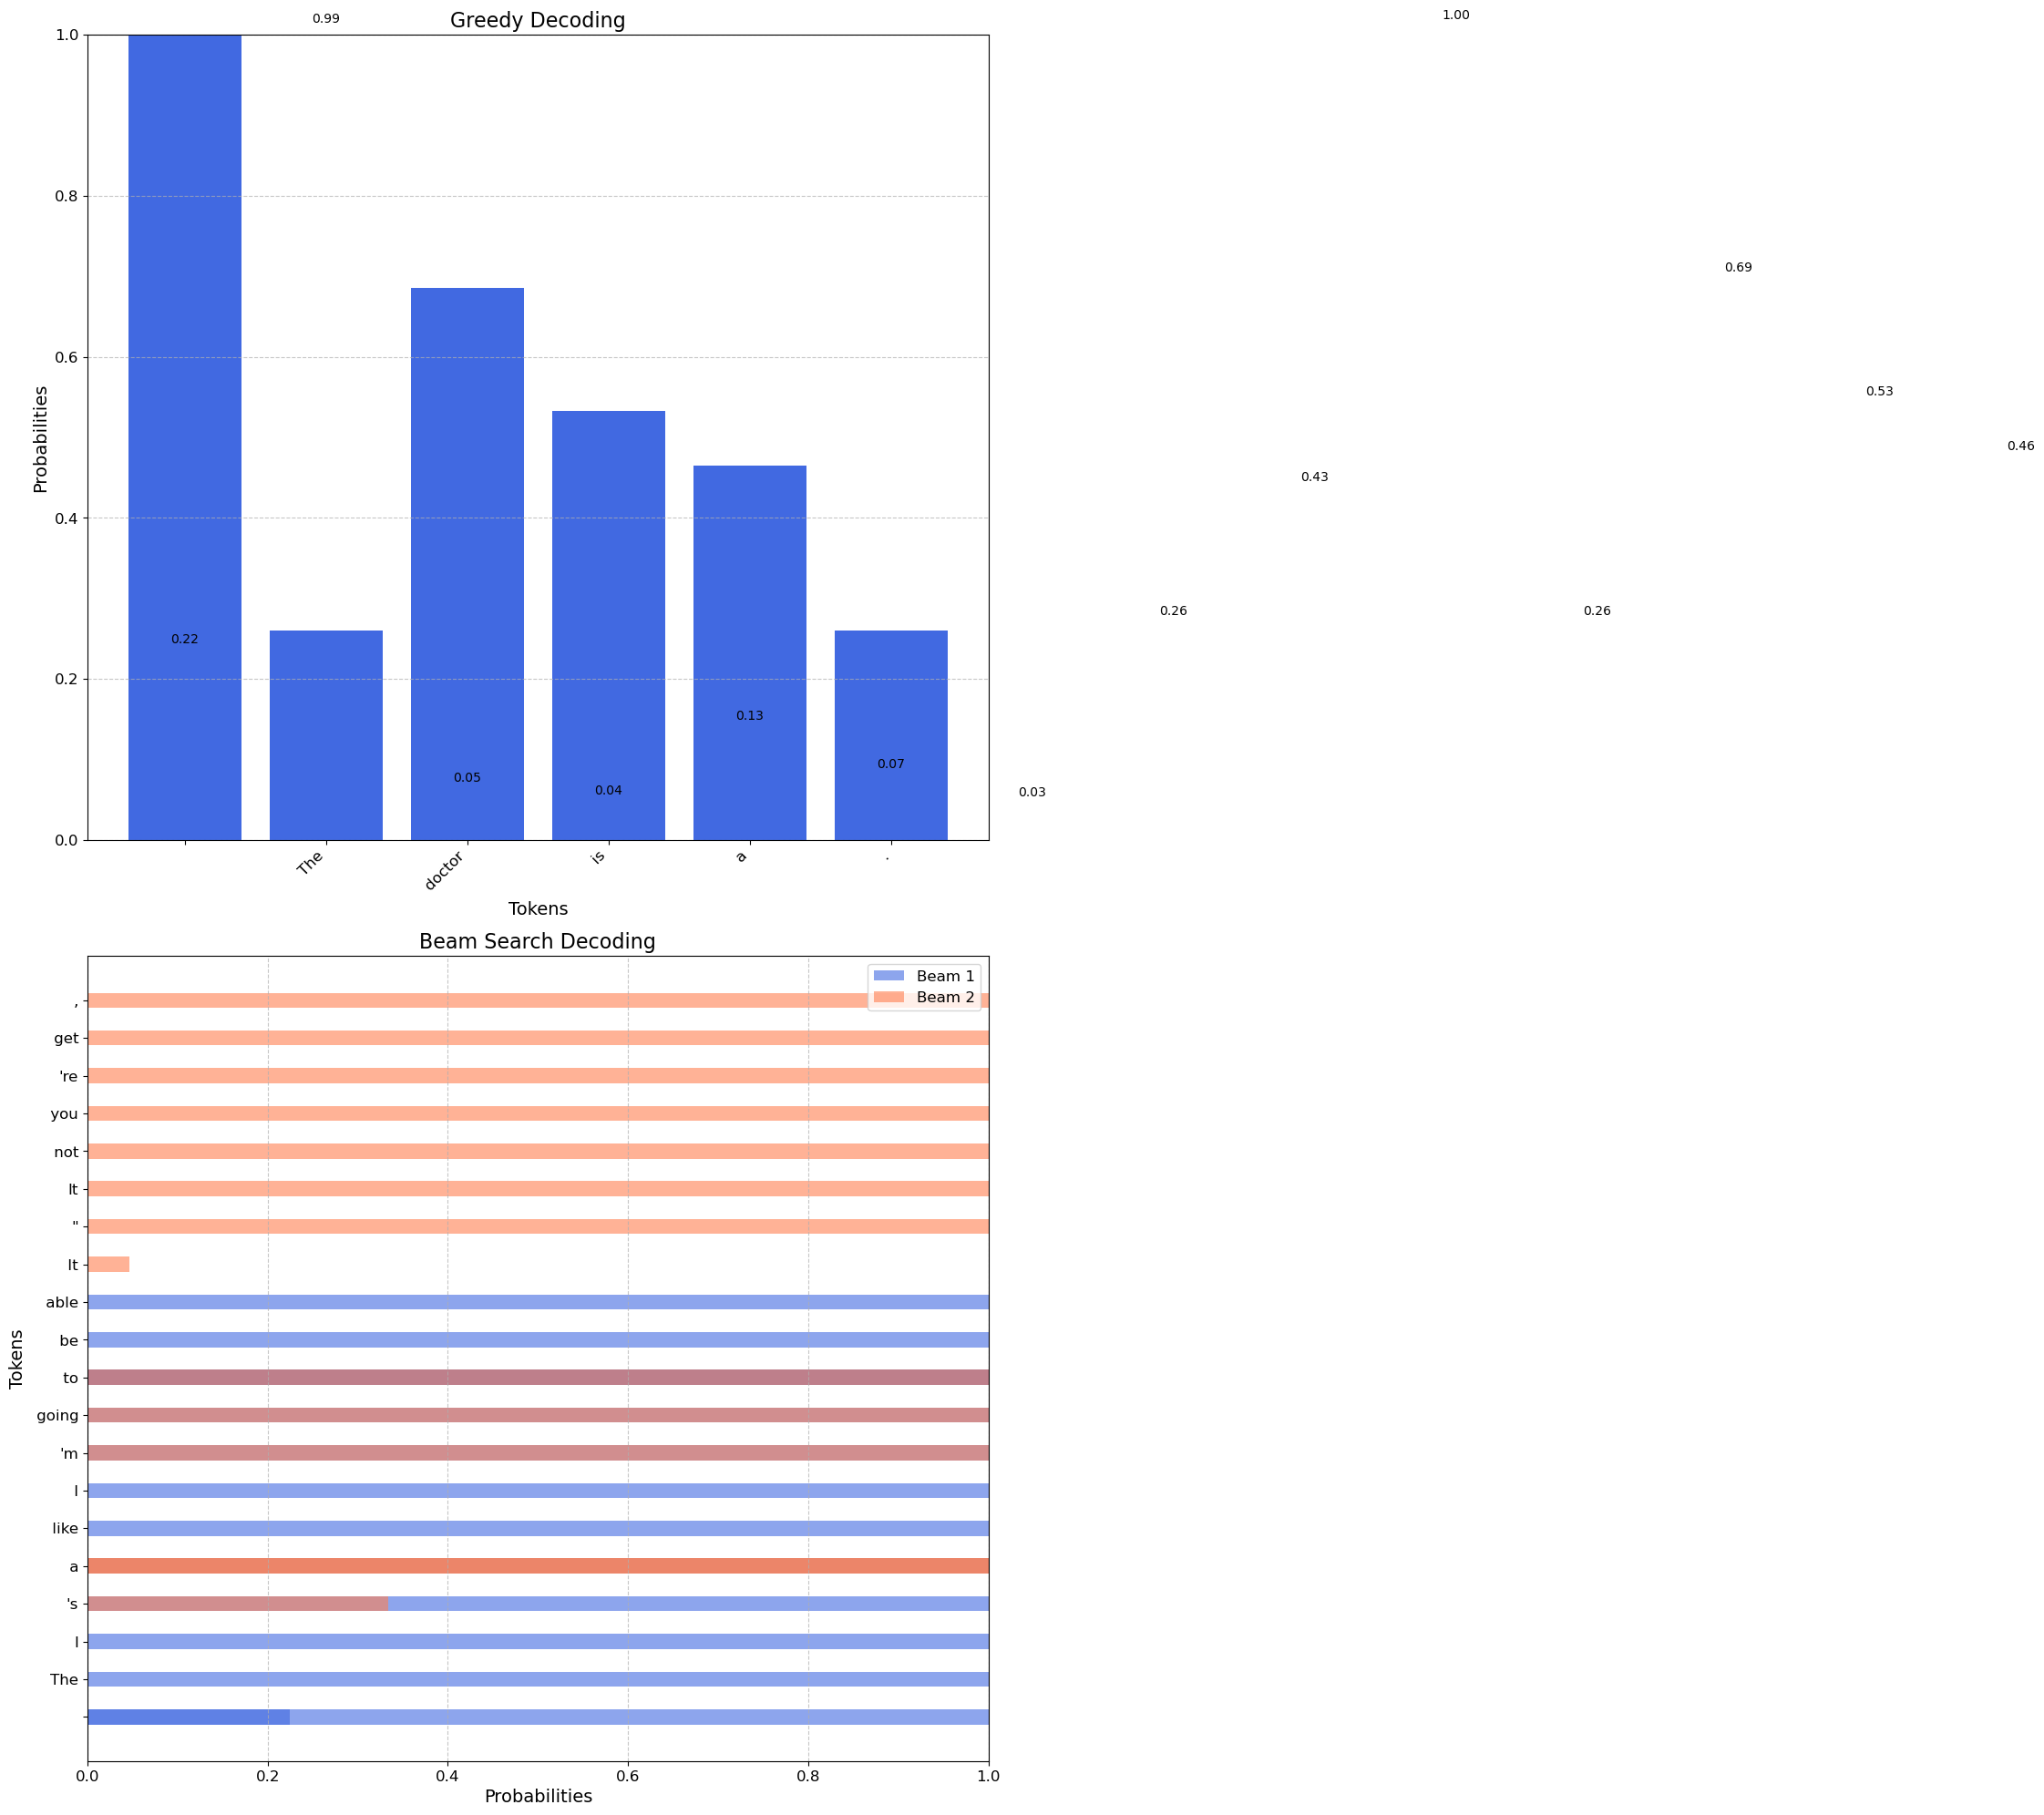

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_decoding_generation(model, tokenizer, sentence, beam_width=2):
    input_ids = tokenizer.encode(sentence, return_tensors='pt')
    
    greedy_tokens = []
    greedy_probs = []

    # Run greedy decoding
    for _ in range(len(input_ids[0]) + 5):
        with torch.no_grad():
            outputs = model(input_ids)
            logits = outputs.logits[:, -1, :]
            probs = torch.softmax(logits, dim=-1)
            token_id = torch.argmax(probs, dim=-1)
            greedy_tokens.append(tokenizer.decode(token_id))
            greedy_probs.append(probs[0, token_id].item())
            input_ids = torch.cat([input_ids, token_id.unsqueeze(0)], dim=1)

    beam_tokens = [[] for _ in range(beam_width)]
    beam_probs = [[] for _ in range(beam_width)]

    input_ids = tokenizer.encode(sentence, return_tensors='pt')
    beam_scores = [0]
    beam_sequences = [input_ids]

    for _ in range(len(input_ids[0]) + 5):  
        all_candidates = []
        for i in range(len(beam_sequences)):
            with torch.no_grad():
                outputs = model(beam_sequences[i])
                logits = outputs.logits[:, -1, :]
                probs = torch.softmax(logits, dim=-1)

                top_k_probs, top_k_ids = torch.topk(probs, beam_width)
                
                for j in range(beam_width):
                    candidate = beam_sequences[i].clone()
                    candidate = torch.cat([candidate, top_k_ids[:, j].unsqueeze(0)], dim=1)
                    all_candidates.append((candidate, beam_scores[i] + top_k_probs[0, j].item()))

        ordered = sorted(all_candidates, key=lambda tup: tup[1], reverse=True)[:beam_width]
        beam_sequences = [x[0] for x in ordered]
        beam_scores = [x[1] for x in ordered]

        for i in range(beam_width):
            beam_tokens[i].append(tokenizer.decode(beam_sequences[i][0, -1]))
            beam_probs[i].append(beam_scores[i])

    plt.figure(figsize=(100, 20))

    plt.subplot(2, 1, 1)
    plt.bar(greedy_tokens, greedy_probs, color='royalblue')
    plt.title('Greedy Decoding', fontsize=16)
    plt.xlabel('Tokens', fontsize=14)
    plt.ylabel('Probabilities', fontsize=14)
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for i, prob in enumerate(greedy_probs):
        plt.text(i, prob + 0.02, f'{prob:.2f}', ha='center', fontsize=10)

    plt.subplot(2, 1, 2)
    colors = ['royalblue', 'coral', 'mediumseagreen', 'gold', 'orchid'] 

    for i in range(beam_width):
        plt.barh(beam_tokens[i], beam_probs[i], color=colors[i % len(colors)], alpha=0.6, label=f'Beam {i + 1}', height=0.4)

    plt.title('Beam Search Decoding', fontsize=16)
    plt.xlabel('Probabilities', fontsize=14)
    plt.ylabel('Tokens', fontsize=14)
    plt.xlim(0, 1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

visualize_decoding_generation(model, tokenizer, "An apple a day keeps the doctor away.")
